In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df.iloc[:,[3,4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [6]:
X.shape

(200, 2)

###### Using the elbow method to find the optimal number of clusters

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',n_init = 10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5,1,'The Elbow Method')

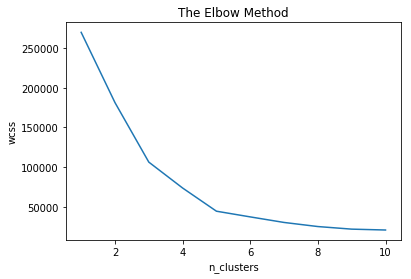

In [9]:
plt.plot(range(1,11),wcss)
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.title('The Elbow Method')

Here we can see that from n_cluster = 5 onwards the slope is almost linear, hence we can assume 5 as the optial number of clusters

###### Applying k-means to the dataset

In [10]:
kmeans = KMeans(n_clusters=5,init='k-means++',n_init=10, max_iter=100, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

###### Visualising the clusters

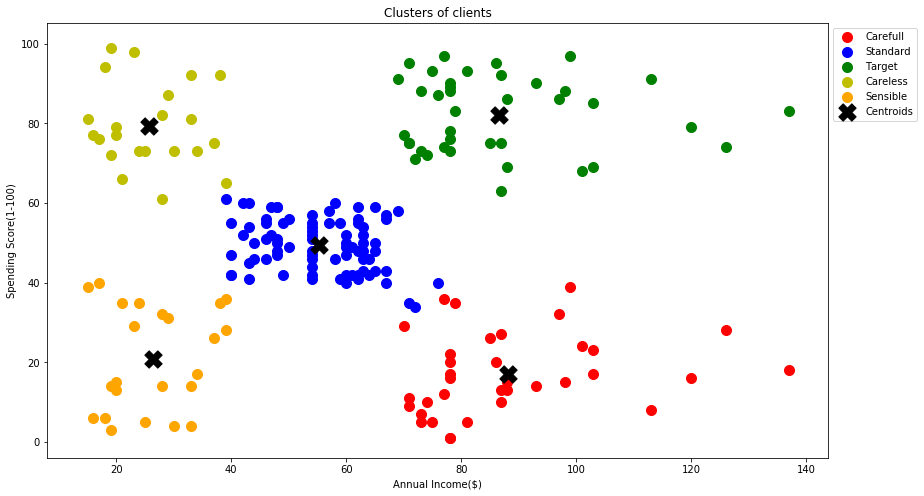

In [12]:
plt.figure(figsize=(14,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='r',label='Carefull')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='b',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='g',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='y',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='orange',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',marker='X',label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income($)')
plt.ylabel('Spending Score(1-100)')
plt.legend(bbox_to_anchor=(1,1))

The visualision is only for two dimensional clustering

### Voila the model is ready!